In [1]:
!pip install playwright --quiet
!playwright install


In [2]:
!pip install openai

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
import os
import openai
import asyncio
from IPython.display import Image, display

In [5]:
async def browse_and_display_then_summarize(user_agent: str, url: str, viewport: dict):
    from playwright.async_api import async_playwright
    from IPython.display import Image, display

    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        context = await browser.new_context(
            user_agent=user_agent,
            viewport=viewport
        )
        
        page = await context.new_page()
        await page.goto(url)

        screenshot_bytes = await page.screenshot(type="png")
        display(Image(data=screenshot_bytes))

        paragraphs = await page.query_selector_all("#mw-content-text p")
        text_content = ""
        for tag in paragraphs[:3]:
            text = await tag.inner_text()
            text_content += text.strip() + "\n\n"

        await browser.close()

    print("\n Extracted Wikipedia Text: \n")
    print(text_content[:800] + "...\n")

    print("\n GPT Summary: \n")

    summary = openai.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "Summarize this Wikipedia article in plain English:"},
            {"role": "user", "content": text_content}
        ],
        temperature=0.5
    )
    
    print(summary.choices[0].message["content"])

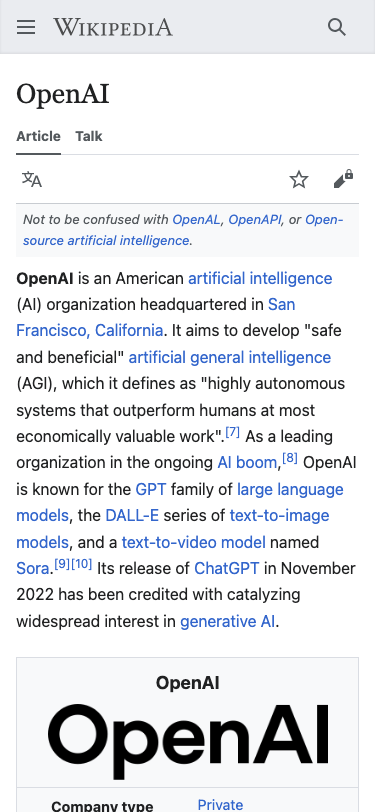


 Extracted Wikipedia Text: 



OpenAI is an American artificial intelligence (AI) organization headquartered in San Francisco, California. It aims to develop "safe and beneficial" artificial general intelligence (AGI), which it defines as "highly autonomous systems that outperform humans at most economically valuable work".[7] As a leading organization in the ongoing AI boom,[8] OpenAI is known for the GPT family of large language models, the DALL-E series of text-to-image models, and a text-to-video model named Sora.[9][10] Its release of ChatGPT in November 2022 has been credited with catalyzing widespread interest in generative AI.

The organization has a complex corporate structure. As of October 2025, it is led by the non-profit OpenAI Foundation, founded in 2015 and registered in Delaware, which holds a 26% equi...


 GPT Summary: 



OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

In [6]:
iphone_user_agent = (
    "Mozilla/5.0 (iPhone; CPU iPhone OS 15_0 like Mac OS X) "
    "AppleWebKit/605.1.15 (KHTML, like Gecko) "
    "Version/15.0 Mobile/15E148 Safari/604.1"
)

viewport = {"width": 375, "height": 812}

await browse_and_display_then_summarize(
    user_agent=iphone_user_agent,
    url="https://en.wikipedia.org/wiki/OpenAI",
    viewport=viewport
)